# A/B Testing Result Analysis

The data department together with the marketing department, compiled a list of hypotheses that may help our company boost the revenue.
First we need to prioritize these hypotheses. Based on the results, we'll launch an A/B test, and analyze the results.

**Project Parts** <a class="anchor" id="table_of_contents"></a>  
[Part 1. Prioritizing Hypothesess](#chapter1)  
[Part 2. A/B Test Analysis](#chapter2)   

## Part 1. Prioritizing Hypotheses
<a class="anchor" id="chapter1"></a>

### 1. Opening the data file

In [1]:
#import libraries of functions
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

try:
    #saving the data provided in the .csv in the variable ---(locally)
    hypotheses = pd.read_csv('hypotheses_us.csv', sep=';')
    
except:
    #saving the data provided in the .csv in the variable ---(platform)
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [2]:
#let's first take a closer look at the data set
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [3]:
#convert columns names to lower case
hypotheses.columns = hypotheses.columns.str.lower()

The file contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each. Now we'll apply the ICE and RICE frameworks to prioritize hypotheses and see if the prioritization of hypotheses changes. If so' we'll try to provide an explanation for the changes.

In [4]:
hypotheses['ICE'] = hypotheses['impact']*hypotheses['confidence']/hypotheses['effort']
print(hypotheses[['hypothesis','ICE']].sort_values('ICE', ascending = False))

                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [5]:
hypotheses['RICE'] = hypotheses['reach']*hypotheses['impact']*hypotheses['confidence']/hypotheses['effort']
print(hypotheses[['hypothesis','RICE']].sort_values('RICE', ascending = False))

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


We see that hypotheses 1,3,4,5 are the last in both methodsd, and in both method, 4 is at the bottom. The most significant change is of hypothesis 8 whcih moved from the middle to the top. The difference between the methods is that RICE is ICE multiplied by the Reach Parameter (how many users will be affected by the update we want to introduce), so it's better to depend more on the RICE score. We'll need to start testing hypothesis 7.

In [6]:
print(hypotheses['hypothesis'][7])

Add a subscription form to all the main pages. This will help you compile a mailing list


## Part 2. A/B Test Analysis
<a class="anchor" id="chapter2"></a>

### 1. Opening the data file

In [7]:
try:
    #saving the data provided in the .csv in the variable ---(locally)
    orders = pd.read_csv(
        'orders_us.csv',
        parse_dates = ['date']
    )
    visits = pd.read_csv(
        'visits_us.csv',
        dtype = {'visits':'int16'}, 
        parse_dates = ['date']
    )
    
except:
    #saving the data provided in the .csv in the variable ---(platform)
    orders = pd.read_csv(
        '/datasets/orders_us.csv', 
        parse_dates = ['date']
    )
    visits = pd.read_csv(
        '/datasets/visits_us.csv',
        dtype = {'visits':'int16'}, 
        parse_dates = ['date']
    )

In [8]:
#show the first rows of the data 
display(orders.head())
visits.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
#names of columns, types and counts
orders.info(memory_usage='deep')
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null float64
group            1197 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 105.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null datetime64[ns]
group     62 non-null object
visits    62 non-null int16
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 4.2 KB


In [10]:
#show statistical summary
display(orders['revenue'].describe(), orders['date'].describe(), orders['group'].describe(),
        visits.describe(), visits['date'].describe(), visits['group'].describe())

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

count     1197
unique       2
top          B
freq       640
Name: group, dtype: object

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


count                      62
unique                     31
top       2019-08-02 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

count     62
unique     2
top        A
freq      31
Name: group, dtype: object

In [11]:
display(orders.duplicated().sum(), visits.duplicated().sum())

0

0

We see that:
- Data types are correct. 
- There's no duplicated rows. 
- There's no missing values.
- The date span is all days in May 2019, total of 31 days.
- The median revenue is 50\\$ and there an extreme value of 19920\\$. The minimum revenue is 5\\$.
- There are more orders from group B.

Now we'll check if there are visitors that have gotten into both group A and group B.

In [12]:
a_and_b = orders.groupby('visitorId').agg({'group':'nunique'})
a_and_b = a_and_b[a_and_b['group']==2].reset_index()
print('The amount of unique users that were assigned for both groups: {}'.format(len(a_and_b)))

The amount of unique users that were assigned for both groups: 58


We'll need to delete those records because each user should be assigned for one group only!

In [13]:
doubled = a_and_b['visitorId']
orders = orders.query('visitorId not in @doubled')
a_and_b = orders.groupby('visitorId').agg({'group':'nunique'})
a_and_b = a_and_b[a_and_b['group']==2].reset_index()
print('The amount of unique users that were assigned for both groups: {}'.format(len(a_and_b)))

The amount of unique users that were assigned for both groups: 0


Now we can continue to our test, but we need to inform the data engineers that we had this issue. First we will calculate all the cunnulative data for each group and then we'll visualize the results.

In [14]:
datesGroups = orders[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
        {'date': 'max', 'group': 'max', 'transactionId': pd.Series.nunique, 'visitorId': pd.Series.nunique, 'revenue': 'sum'}),
        axis=1
).sort_values(by=['date', 'group'])

visitsAggregated = datesGroups.apply(
    lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
    .agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = ['date','group','orders','buyers','revenue','visitors']
cumulativeData.head(10)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845
5,2019-08-03,B,54,53,4606.9,1803
6,2019-08-04,A,77,71,6225.6,2562
7,2019-08-04,B,68,66,6138.5,2573
8,2019-08-05,A,99,92,7623.6,3318
9,2019-08-05,B,89,87,7587.8,3280


- **Graph cumulative revenue by group. Make conclusions and conjectures.**

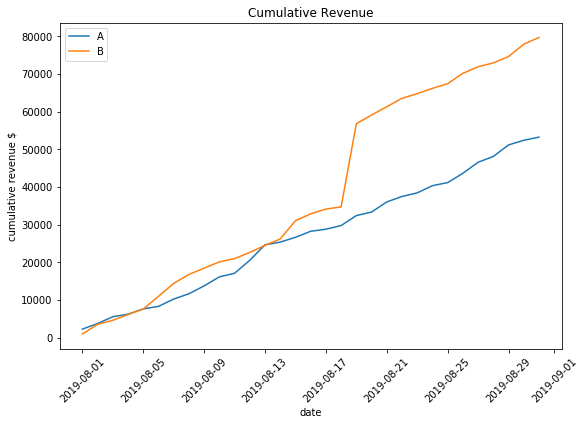

In [16]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(9,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45)
plt.title('Cumulative Revenue')
plt.xlabel('date')
plt.ylabel('cumulative revenue $')
plt.legend(); 

Revenue is rising steadily throughout the whole test. At the first two weeks the groups act the same but afterwards group B's cumulative revenue is much higher than A's. Maybe there are very expensive orders in the sample of group B, we'll check it later.

- **Graph cumulative average order size by group. Make conclusions and conjectures.**

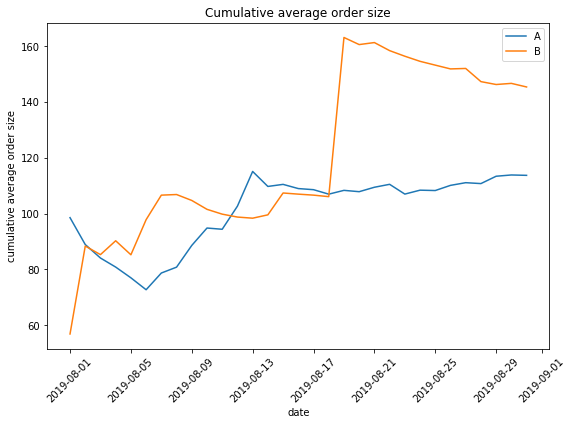

In [17]:
plt.figure(figsize=(9,6))
#calculate and plot the average order size by group
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.title('Cumulative average order size')
plt.xlabel('date')
plt.ylabel('cumulative average order size')
plt.legend();

For group A, first the average purchase size drops in the first days and than grows and becomes steady by the middle of the test. For group B there are a lot of changes. In general we can say that till the 2019-08-19 there is a growth and then it starts to drop. This extreme jump in group B at 2019-08-19 is probably due to expensive orders.

- **Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.**

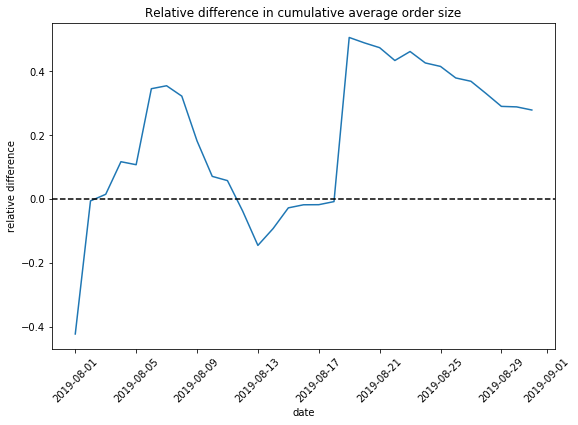

In [18]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(9,6))
plt.plot(
    mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('Relative difference in cumulative average order size')
plt.xlabel('date')
plt.ylabel('relative difference'); 

We see that the relative difference in cumulative average order size spikes at several points. This means there must be some big orders and outliers.

- **Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.**

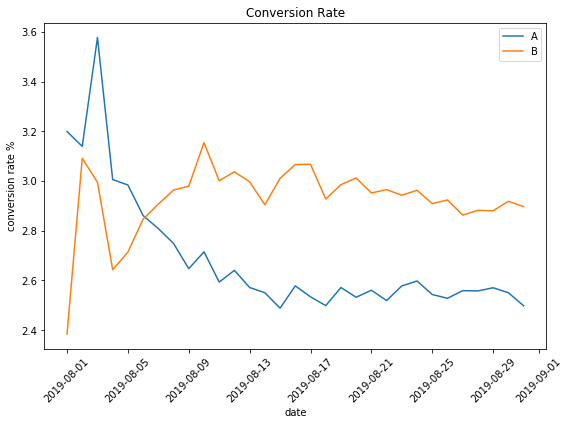

In [19]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(9,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion']*100, label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion']*100, label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('Conversion Rate')
plt.xlabel('date')
plt.ylabel('conversion rate %');

The groups were fluctuating around different value. Group A's conversion rate dropped but then stabilized around 2.5%, and group B's rose and dropped and then rose again before stabilizing on 3%.

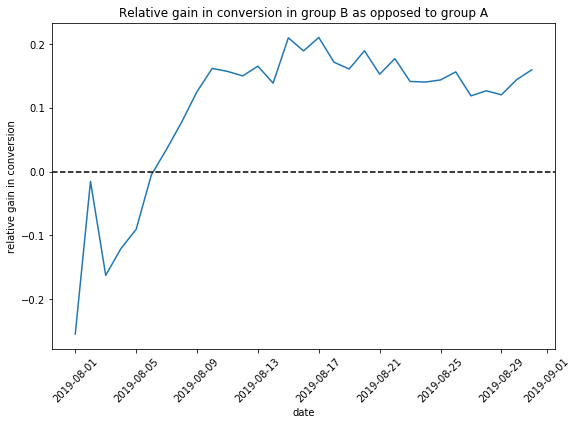

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(9,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('Relative gain in conversion in group B as opposed to group A')
plt.xlabel('date')
plt.ylabel('relative gain in conversion');

As we can see, at the beginning, group B's relative gain in conversion is negative, which means that group A's had a larger conversion rate, but then the relative gain stabilized.

- **Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.**

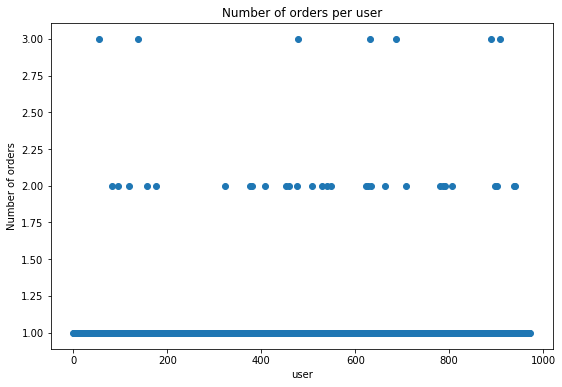

In [21]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(9,6))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Number of orders per user')
plt.xlabel('user')
plt.ylabel('Number of orders'); 

Most of the users order only once during this month. Only a tiny share buys more than that, and the max number of orders per user is 3.

- **Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.**

In [22]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 1. 2.]


Not more than 5% of the users ordered more than once. Thus, it would be reasonable to consider that more than one order per user is an anomaly.

- **Plot a scatter chart of order prices. Make conclusions and conjectures.**

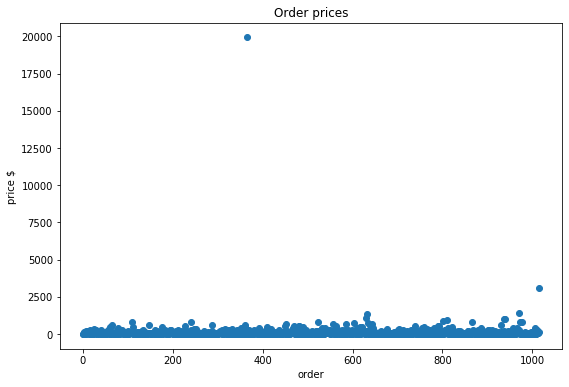

In [23]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(9,6))
plt.scatter(x_values, orders['revenue'])
plt.title('Order prices')
plt.xlabel('order')
plt.ylabel('price $'); 

There are two extremely big orders, probably those who caused the differences between the groups. Based on the graph, we can set the limit for abnormal orders around \\$1,000 but we'll check the exact value on the next step.

- **Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.**

In [24]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[280.8   414.275 830.3  ]


Not more than 5% of the orderes are more than \\$414.275. Thus, it would be reasonable to consider orders more than \\$415 as an anomaly.

- **Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.**

For the first hypothesis we'll define the null hypothesis and the alternative hepothesis as follow:
- $H_0$ : $\mu$(`conversion` of group A) = $\mu$(`conversion` of group B)  
- $H_a$ : $\mu$(`conversion` of group A) != $\mu$(`conversion` of group B)  

First we will check if our distribution is normal with Shapiro-Wilk test for normality and than we'll decide which test to choose. The hypothesis for the Shapiro-Wilk are as follow:
- $H_0$ : the data has a normal distribution
- $H_a$ : the data doesn't have a normal distribution

In [25]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

#first we'll check for normality
display(st.shapiro(sampleA), st.shapiro(sampleB))

(0.13264614343643188, 0.0)

(0.15058749914169312, 0.0)

As we can see, the distribution is not normal so we need to use the mann-whitneyu method.

In [26]:
print("p-value: {0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print("Group B's relative gain in conversion: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

p-value: 0.00551
Group B's relative gain in conversion: 0.160


Based on the results we can say that the conversion rates differs between the groups and the relative gained coversion of group B is positive.

- **Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.**

For the first hypothesis we'll define the null hypothesis and the alternative hepothesis as follow:
- $H_0$ : $\mu$(`average order size` of group A) = $\mu$(`average order size` of group B)  
- $H_a$ : $\mu$(`average order size` of group A) != $\mu$(`average order size` of group B)  

First we will check if our distribution is normal with Shapiro-Wilk test for normality and than we'll decide which test to choose. The hypothesis for the Shapiro-Wilk are as follow:
- $H_0$ : the data has a normal distribution
- $H_a$ : the data doesn't have a normal distribution

In [27]:
sampleA = orders[orders['group']=='A']['revenue']
sampleB = orders[orders['group']=='B']['revenue']
#first we'll check for normality
display(st.shapiro(sampleA), st.shapiro(sampleB))

(0.6051600575447083, 2.7709587438572045e-31)

(0.08029580116271973, 4.203895392974451e-45)

As we can see, the distribution is not normal so we need to use the mann-whitneyu method.

In [28]:
print('p-value: {0:.3f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))
print("Group B's relative gain in average order size: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-value: 0.431
Group B's relative gain in average order size: 0.278


Based on the results, there isn't a statistical significance of the difference between groups A and B in terms of average order size, although the relative gained average order size of group B is positive.

- **Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.**

First we will filter the data and then check the differences of the filtered data.

In [29]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 1]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 415]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

print(abnormalUsers.head())
print('The number of abnormal users: ', len(abnormalUsers))

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
The number of abnormal users:  86


In [30]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')]
    ,axis=0)
sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')]
    ,axis=0) 

#first we'll check for normality
display(st.shapiro(sampleAFiltered), st.shapiro(sampleBFiltered))

(0.12683314085006714, 0.0)

(0.14204901456832886, 0.0)

As we can see, the distribution is not normal so we need to use the mann-whitneyu method.

In [31]:
print("p-value: {0:.5f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Group B's relative gain in conversion: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.00797
Group B's relative gain in conversion: 0.174


Based on the results we can say that the conversion rates differs between the groups and the relative gained coversion of group B is positive.

- **Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.**

In [32]:
sampleAFiltered = orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']
sampleBFiltered = orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']

#first we'll check for normality
display(st.shapiro(sampleAFiltered), st.shapiro(sampleBFiltered))

(0.7915213704109192, 1.9246829051796534e-22)

(0.7629193067550659, 9.619500533352445e-26)

As we can see, the distribution is not normal so we need to use the mann-whitneyu method.

In [33]:
print('p-value: {0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Group B's relative gain in average order size: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.38559
Group B's relative gain in average order size: -0.033


Based on the filtered results we can say that there's no statistical significance of the difference in average order size between the groups, although the relative gained average order size of group B is negative, which means that in average, the gain in average order size is larger for group A than B.

- **Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.**

In general, the data we got was of a good quality. We didn't have missing values or duplicates, but we had a problem with some users that appeared in both of the groups and we need to investigate why it happend.
Also we had some anomalies in the data in terms of number of orders per users and the order sizes. The order size had two very extreme values and we need to see if this an anomaly or an error while gathering the data.
We tested our hypothesis twice, with the raw data and with the filtered one.

From the filtered data we learn that the conversion rates differs between the groups and the relative gained coversion of group B is higher, which means that on average, the gained conversion rate of group B is higher.
Also we can say that there's no statistical significance of the difference in average order size between the groups, although the relative gained average order size of group B is negative, which means that in average, the gain in average order size is a bit larger for group A than B. So in general we can say that the conversion rate is better in group B and the average order size is a bit better for group A. 
We think it's is possible to improve the average order size of group B and in terms of conversion rate it is successfull, so we stop the test and consider group B as the leader!